In [1]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # 准确率
from sklearn.model_selection import GridSearchCV

import pandas as pd

# 加载样本数据集
df = pd.read_excel(r'D:\chengongzju\温州自建路面液位仪\2020年数据/数据驱动原始数据.xlsx', sheet_name=4)
X = df[['Num','PeakRain','MeanRain','DuSe']]
#编号，20min峰值降雨量，平均降雨量，堵塞程度
y = df[['WaterLevel']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=6666)  # 数据集分割


47
accuarcy: 95.02%


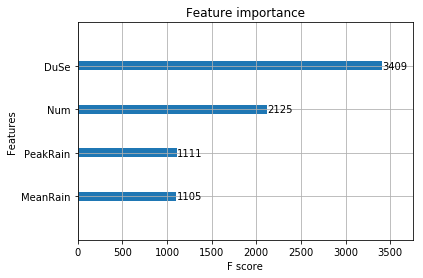

In [8]:
# 训练模型,这里是分类，n_estimators就是num_round
model = xgb.XGBClassifier(max_depth=3, learning_rate=0.03,min_child_weight = 1,gamma=0.1,
                          n_estimators=240,silent=True, objective='multi:softmax',
                          nthread=8)
Eval_set = [(X_train, y_train), (X_test, y_test)]

model.fit(X_train,y_train,eval_metric=["mlogloss"],eval_set=Eval_set,verbose=False)

# 对测试集进行预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test,y_pred)
print("accuarcy: %.2f%%" % (accuracy*100.0))

# 显示重要特征
plot_importance(model)
plt.show()

# plt.figure()
# plt.scatter(y_pred,y_test,marker='X',s=5,c='blue')
# plt.title('XGBRegressor training set & test set prediction vs true')
# plt.xlabel('xgbr_y_predict')
# plt.ylabel('y_true value')
# plt.show()

In [6]:
predictions = [round(value) for value in y_pred]
# print(predictions)
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig1, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

# plot classification error
fig2, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

AttributeError: 'XGBClassifier' object has no attribute 'evals_result_'

In [3]:
#这里是参数寻优
import numpy as np
colsample_bylevel_Rate = np.arange(0, 1, 0.1)
colsample_bytree_Rate = np.arange(0.1, 0.9, 0.1)

colsample_max_depth = np.arange(1, 4 )
colsample_learning_rate= np.arange(0, 0.2, 0.01)
# colsample_min_child_weight= np.arange(0, 1, 0.1)
colsample_n_estimators= np.arange(40, 400, 20)
# 网格搜索，参数优化
estimator =xgb.XGBClassifier(learning_rate=0.03,min_child_weight = 1,gamma=0.1, base_score=0,colsample_bytree=0.6,silent=True, objective='multi:softmax',nthread=8)
#colsample_bylevel=1,colsample_bytree=0.3
param_grid = {
'max_depth':colsample_max_depth,'n_estimators':colsample_n_estimators
}

param_find = GridSearchCV(estimator, param_grid)
param_find.fit(X_train, y_train)
print('Best parameters found by grid search are:', param_find.best_params_)
print('Best score found by grid search are:', param_find.best_score_)

c:\users\chengong\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\chengong\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\chengong\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters found by grid search are: {'max_depth': 3, 'n_estimators': 220}
Best score found by grid search are: 0.9519045786841093
